In [1]:
import pandas as pd

df = pd.read_csv(
    "noticias_unificadas.tsv",
    encoding="utf-8",
    sep="\t",
    dtype={"fecha": "string", "titulo": "string", "contenido": "string", "seccion": "string", "link": "string"},
    quoting=0,
    na_filter=False
)

In [2]:
df.head()

,fecha,titulo,contenido,seccion,link
0,2025-11-09,Jueces rechazan intento de afectación a la ind...,"Desde la ciudad de Tacna, jueces y juezas de t...",Política,https://diariocorreo.pe/politica/jueces-rechaz...
1,2025-11-09,Liga 1: Lo gritan los “Churres” y todo el pueb...,Alianza Atlético le sacó lustre a su clasifica...,Deportes,https://diariocorreo.pe/deportes/alianza-atlet...
2,2025-11-09,Proponen sancionar con hasta 10 años de cárcel...,"La congresista Elizabeth Medina Hermosillo, de...",Política,https://diariocorreo.pe/politica/proponen-sanc...
3,2025-11-09,Este lunes inicia la semana de representación ...,Desde este lunes 10 hasta el viernes 14 de nov...,Política,https://diariocorreo.pe/politica/este-lunes-in...
4,2025-11-09,Selección peruana evalúa reprogramación de par...,La Federación Peruana de Fútbol (FPF) informó ...,Deportes,https://diariocorreo.pe/deportes/seleccion-per...


In [22]:
from utils.utils import clean_text

df["headline_text"] = (df["seccion"].fillna("") + " " + df["titulo"].fillna("") + " " + df["contenido"].fillna(""))
df["headline_text"] = df["headline_text"].map(clean_text)

df.head()

,fecha,titulo,contenido,seccion,link,headline_text
0,2025-11-09,Jueces rechazan intento de afectación a la ind...,"Desde la ciudad de Tacna, jueces y juezas de t...",Política,https://diariocorreo.pe/politica/jueces-rechaz...,politica jueces rechazan intento de afectacion...
1,2025-11-09,Liga 1: Lo gritan los “Churres” y todo el pueb...,Alianza Atlético le sacó lustre a su clasifica...,Deportes,https://diariocorreo.pe/deportes/alianza-atlet...,deportes liga 1: lo gritan los “churres” y tod...
2,2025-11-09,Proponen sancionar con hasta 10 años de cárcel...,"La congresista Elizabeth Medina Hermosillo, de...",Política,https://diariocorreo.pe/politica/proponen-sanc...,politica proponen sancionar con hasta 10 anos ...
3,2025-11-09,Este lunes inicia la semana de representación ...,Desde este lunes 10 hasta el viernes 14 de nov...,Política,https://diariocorreo.pe/politica/este-lunes-in...,politica este lunes inicia la semana de repres...
4,2025-11-09,Selección peruana evalúa reprogramación de par...,La Federación Peruana de Fútbol (FPF) informó ...,Deportes,https://diariocorreo.pe/deportes/seleccion-per...,deportes seleccion peruana evalua reprogramaci...


In [23]:
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import gensim

STOPWORDS = set(stopwords.words("spanish"))

In [24]:

STOP_EXTRA = {"dijo","anos","foto","video","puedes","ver","hoy","ayer","manana", "mas", "recomendado", "ser", "dia", "dias", "tambien", "cada", "tras", "soles", "uno", "dos", "tres", "asi", "mil", "ano", "año", "solo", "senalo", "segun", "entre", "millones", "lugar", "puede", "haber", "tener", "sol","precio", "yape", "pai", "nueva"}
STOPWORDS |= STOP_EXTRA

In [ ]:
from nltk.stem.snowball import SnowballStemmer

spanish_stemmer = SnowballStemmer('spanish')

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3:
            stemmed = spanish_stemmer.stem(token)
            result.append(stemmed)
    return result

In [45]:
stem = spanish_stemmer.stem("bueno")
print(f"bueno -> {stem}")

bueno -> buen


In [46]:
data_text = df[['headline_text']]
data_text['index'] = data_text.index
doc_sample = data_text[data_text['index'] == 4310].values[0][0]
documents = data_text

/var/folders/kg/gsqh5zwj35gdpwht2zn10d3r0000gn/T/ipykernel_11226/179027989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index'] = data_text.index


In [47]:
print(len(documents))
print(documents[:5])

37746
                                       headline_text  index
0  politica jueces rechazan intento de afectacion...      0
1  deportes liga 1: lo gritan los “churres” y tod...      1
2  politica proponen sancionar con hasta 10 anos ...      2
3  politica este lunes inicia la semana de repres...      3
4  deportes seleccion peruana evalua reprogramaci...      4


In [48]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('documento original: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n documento tokenizado y lematizado: ')
print(preprocess(doc_sample))

documento original: 
['politica', 'congreso:', 'presentan', 'proyecto', 'de', 'ley', 'para', 'prohibir', 'el', 'uso', 'del', 'condor', 'andino', 'en', 'actividades', 'publicas', 'la', 'congresista', 'katy', 'ugarte,', 'del', 'bloque', 'magisterial,', 'presento', 'un', 'proyecto', 'de', 'ley', 'que', 'busca', 'prohibir', 'el', 'uso', 'del', 'condor', 'andino', 'en', 'festividades,', 'espectaculos', 'o', 'cualquier', 'actividad', 'publica', 'que', 'implique', 'riesgo', 'o', 'maltrato', 'para', 'esta', 'especie.', 'la', 'iniciativa', 'tambien', 'plantea', 'la', 'prohibicion', 'de', 'su', 'caza,', 'captura,', 'comercializacion', 'y', 'transporte', 'con', 'fines', 'lucrativos,', 'como', 'parte', 'de', 'una', 'estrategia', 'para', 'garantizar', 'su', 'recuperacion', 'y', 'conservacion.el', 'proyecto,', 'denominado', '“ley', 'de', 'recuperacion', 'y', 'conservacion', 'del', 'condor', 'andino”,', 'tiene', 'como', 'objetivo', 'principal', 'proteger', 'a', 'esta', 'ave', 'emblematica', 'y', 'su'

In [49]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:10]

0    [polit, juec, rechaz, intent, afect, independe...
1    [deport, lig, grit, churr, puebl, sullan, alia...
2    [polit, propon, sancion, carcel, cubr, rostr, ...
3    [polit, lun, inici, seman, represent, congres,...
4    [deport, seleccion, peruan, evalu, reprogram, ...
5    [polit, pacasmay, orden, identific, trabaj, co...
6    [polit, gobiern, aprueb, increment, sueld, dip...
7    [espectacul, geek, festival, peru, trasl, parq...
8    [polit, congres, present, proyect, busc, elimi...
9    [cultur, jorg, espinoz, celebr, don, jorg, esp...
Name: headline_text, dtype: object

In [30]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0

for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abandono
1 adema
2 afectacion
3 afectarian
4 agravio
5 aprobacion
6 aprobado
7 aprueba
8 aprueban
9 ascenso
10 autonomia


In [ ]:
dictionary.filter_extremes(no_below=10, no_above=0.3, keep_n=100000)

In [13]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 1 ("adema") appears 1 time.
Word 13 ("busca") appears 2 time.
Word 19 ("congresista") appears 1 time.
Word 20 ("congreso") appears 2 time.
Word 26 ("denominado") appears 1 time.
Word 47 ("iniciativa") appears 2 time.
Word 64 ("legislativa") appears 1 time.
Word 69 ("mediant") appears 1 time.
Word 74 ("nacion") appears 3 time.
Word 79 ("pai") appears 1 time.
Word 80 ("part") appears 2 time.
Word 83 ("politica") appears 2 time.
Word 84 ("presentan") appears 1 time.
Word 91 ("proyecto") appears 3 time.
Word 93 ("publica") appears 3 time.
Word 229 ("quedan") appears 1 time.
Word 251 ("supuesta") appears 1 time.
Word 274 ("asimismo") appears 1 time.
Word 287 ("derecho") appears 1 time.
Word 295 ("establec") appears 1 time.
Word 322 ("norma") appears 1 time.
Word 330 ("penal") appears 1 time.
Word 333 ("plantea") appears 1 time.
Word 336 ("presento") appears 1 time.
Word 342 ("propon") appears 1 time.
Word 344 ("propuesta") appears 1 time.
Word 345 ("proteccion") appears 1 time.
Word 34

In [ ]:
import multiprocessing

lda_model = gensim.models.LdaMulticore(
    bow_corpus, 
    num_topics=7, 
    id2word=dictionary, 
    passes=10, 
    iterations=200,
    workers=min(4, multiprocessing.cpu_count() - 1),
    eval_every=None,
    per_word_topics=True
)

In [15]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.007*"caso" + 0.006*"boluart" + 0.006*"fiscal" + 0.006*"politica" + 0.005*"ministro" + 0.005*"nacion" + 0.005*"congreso" + 0.004*"publico" + 0.004*"investigacion" + 0.004*"fiscalia"
Topic: 1 
Words: 0.007*"trump" + 0.007*"president" + 0.005*"partido" + 0.005*"politica" + 0.005*"eleccion" + 0.004*"nacion" + 0.004*"pai" + 0.004*"unido" + 0.004*"congreso" + 0.003*"ahora"
Topic: 2 
Words: 0.005*"nacion" + 0.005*"deport" + 0.004*"partido" + 0.004*"lima" + 0.004*"ahora" + 0.004*"equipo" + 0.004*"alianza" + 0.004*"experiencia" + 0.004*"epap" + 0.003*"universitario"
Topic: 3 
Words: 0.005*"gobierno" + 0.005*"politica" + 0.005*"pai" + 0.004*"nacion" + 0.004*"congreso" + 0.003*"lima" + 0.003*"venezuela" + 0.003*"mineria" + 0.003*"ministro" + 0.003*"economia"
Topic: 4 
Words: 0.005*"pai" + 0.004*"experiencia" + 0.004*"economia" + 0.003*"lima" + 0.003*"empresa" + 0.003*"peruano" + 0.003*"cultura" + 0.003*"nacion" + 0.003*"ahora" + 0.003*"mundo"
Topic: 5 
Words: 0.004*"policia" + 

## Interpretación y Etiquetado de Tópicos

LDA encuentra tópicos **automáticamente** pero NO les asigna nombres. Los números (0, 1, 2...) son solo índices.

**Tu trabajo**: Interpretar las palabras clave de cada tópico y asignarle un nombre descriptivo.

In [16]:
import re

def extract_topic_words(lda_model, num_words=10):
    """
    Extrae las palabras principales de cada tópico de forma limpia.
    """
    topics = {}
    for idx, topic in lda_model.print_topics(-1, num_words=num_words):
        # Extraer solo las palabras (sin los pesos)
        words = re.findall(r'"([^"]+)"', topic)
        topics[idx] = words
    return topics

# Extraer palabras clave por tópico
topic_words = extract_topic_words(lda_model, num_words=10)

print("=" * 80)
print("TÓPICOS DESCUBIERTOS POR LDA")
print("=" * 80)

for topic_id, words in topic_words.items():
    print(f"\n🔹 Tópico {topic_id}:")
    print(f"   Palabras clave: {', '.join(words)}")
    print(f"   → Posible tema: [ANALIZAR MANUALMENTE]")

TÓPICOS DESCUBIERTOS POR LDA

🔹 Tópico 0:
   Palabras clave: caso, boluart, fiscal, politica, ministro, nacion, congreso, publico, investigacion, fiscalia
   → Posible tema: [ANALIZAR MANUALMENTE]

🔹 Tópico 1:
   Palabras clave: trump, president, partido, politica, eleccion, nacion, pai, unido, congreso, ahora
   → Posible tema: [ANALIZAR MANUALMENTE]

🔹 Tópico 2:
   Palabras clave: nacion, deport, partido, lima, ahora, equipo, alianza, experiencia, epap, universitario
   → Posible tema: [ANALIZAR MANUALMENTE]

🔹 Tópico 3:
   Palabras clave: gobierno, politica, pai, nacion, congreso, lima, venezuela, mineria, ministro, economia
   → Posible tema: [ANALIZAR MANUALMENTE]

🔹 Tópico 4:
   Palabras clave: pai, experiencia, economia, lima, empresa, peruano, cultura, nacion, ahora, mundo
   → Posible tema: [ANALIZAR MANUALMENTE]

🔹 Tópico 5:
   Palabras clave: policia, ahora, experiencia, mundo, epap, persona, cueva, dispon, ataqu, buscano
   → Posible tema: [ANALIZAR MANUALMENTE]

🔹 Tópico 6

In [17]:
# Asignar nombres interpretativos a los tópicos (AJUSTAR SEGÚN TUS RESULTADOS)
# Analiza las palabras clave arriba y asigna nombres descriptivos
topic_names = {
    0: "Tema 0 - [Analizar palabras y nombrar]",
    1: "Tema 1 - [Analizar palabras y nombrar]",
    2: "Tema 2 - [Analizar palabras y nombrar]",
    3: "Tema 3 - [Analizar palabras y nombrar]",
    4: "Tema 4 - [Analizar palabras y nombrar]",
    5: "Tema 5 - [Analizar palabras y nombrar]",
    6: "Tema 6 - [Analizar palabras y nombrar]",
    7: "Tema 7 - [Analizar palabras y nombrar]",
    8: "Tema 8 - [Analizar palabras y nombrar]",
    9: "Tema 9 - [Analizar palabras y nombrar]",
}

# Ejemplo de cómo podría verse después de analizar:
# topic_names = {
#     0: "Deportes - Fútbol",
#     1: "Política - Gobierno",
#     2: "Economía - Negocios",
#     3: "Salud - COVID-19",
#     ...
# }

print("\n" + "=" * 80)
print("TÓPICOS CON NOMBRES INTERPRETATIVOS")
print("=" * 80)

for topic_id, words in topic_words.items():
    print(f"\n📌 {topic_names[topic_id]}")
    print(f"   Palabras: {', '.join(words[:7])}")



TÓPICOS CON NOMBRES INTERPRETATIVOS

📌 Tema 0 - [Analizar palabras y nombrar]
   Palabras: caso, boluart, fiscal, politica, ministro, nacion, congreso

📌 Tema 1 - [Analizar palabras y nombrar]
   Palabras: trump, president, partido, politica, eleccion, nacion, pai

📌 Tema 2 - [Analizar palabras y nombrar]
   Palabras: nacion, deport, partido, lima, ahora, equipo, alianza

📌 Tema 3 - [Analizar palabras y nombrar]
   Palabras: gobierno, politica, pai, nacion, congreso, lima, venezuela

📌 Tema 4 - [Analizar palabras y nombrar]
   Palabras: pai, experiencia, economia, lima, empresa, peruano, cultura

📌 Tema 5 - [Analizar palabras y nombrar]
   Palabras: policia, ahora, experiencia, mundo, epap, persona, cueva

📌 Tema 6 - [Analizar palabras y nombrar]
   Palabras: ahora, espectaculo, vida, experiencia, momento, siempr, lima


### 📊 Visualización de Tópicos

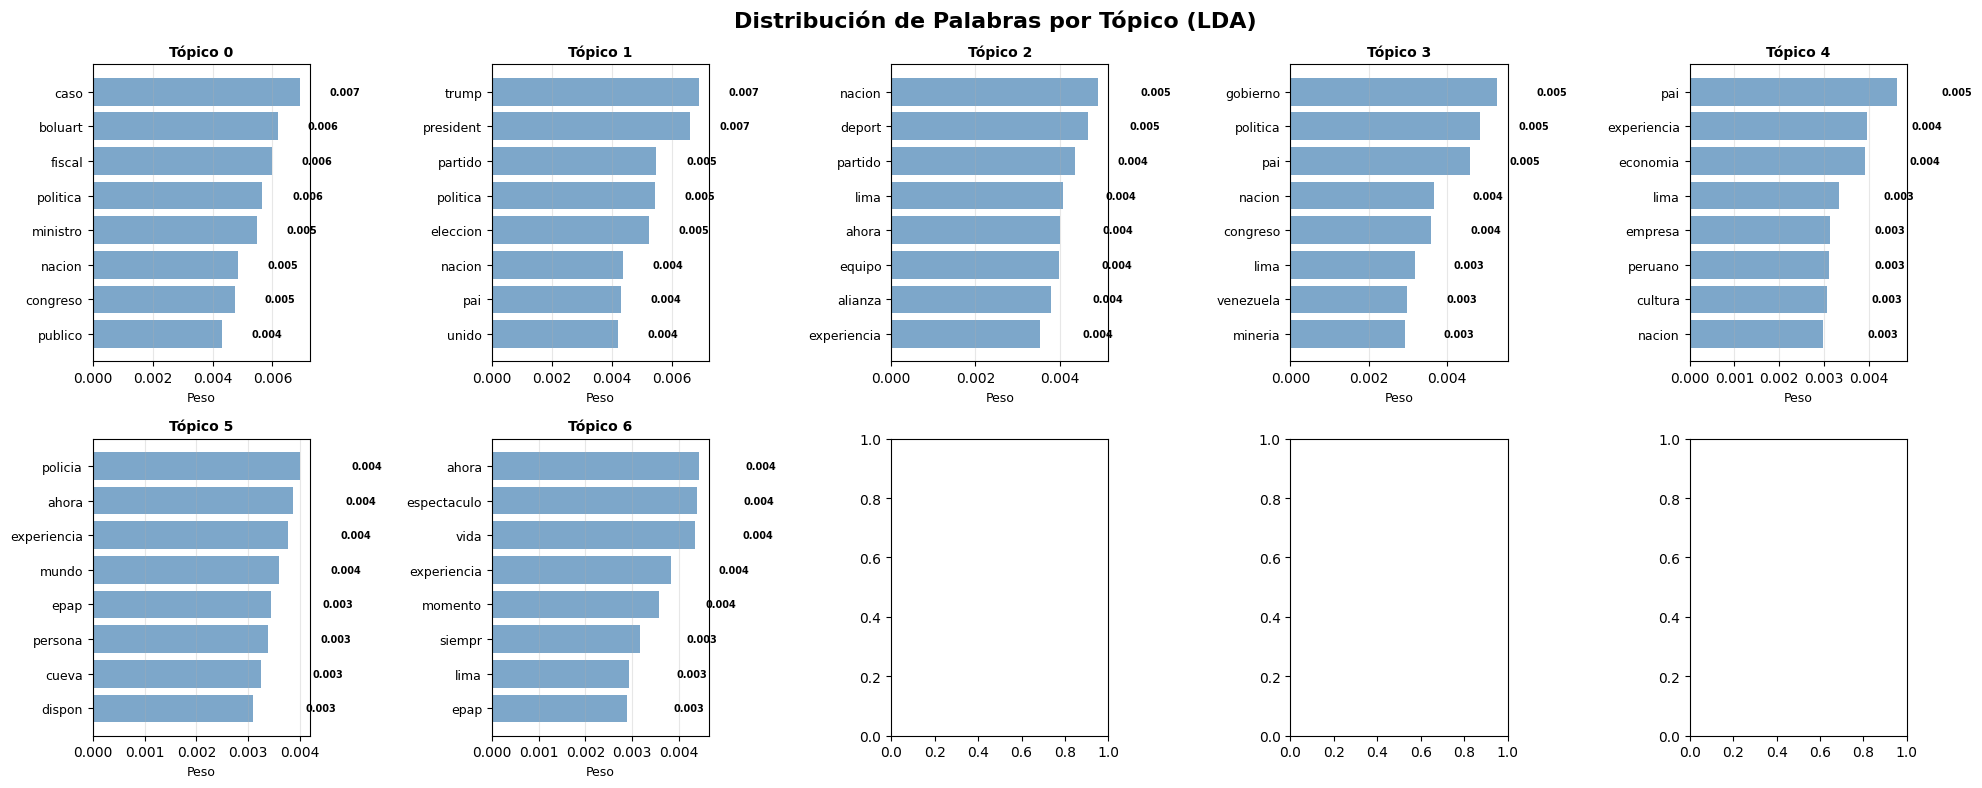

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_topics(lda_model, topic_names=None, num_words=8):
    """
    Visualiza los tópicos con sus palabras más importantes.
    """
    topics = lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False)
    
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    fig.suptitle('Distribución de Palabras por Tópico (LDA)', fontsize=16, fontweight='bold')
    axes = axes.flatten()
    
    for idx, (topic_id, words) in enumerate(topics):
        if idx >= len(axes):
            break
            
        # Extraer palabras y pesos
        word_list = [word for word, _ in words]
        weight_list = [weight for _, weight in words]
        
        # Nombre del tópico
        if topic_names and topic_id in topic_names:
            title = f"Tópico {topic_id}\n{topic_names[topic_id]}"
        else:
            title = f"Tópico {topic_id}"
        
        # Graficar
        axes[idx].barh(range(len(word_list)), weight_list, color='steelblue', alpha=0.7)
        axes[idx].set_yticks(range(len(word_list)))
        axes[idx].set_yticklabels(word_list, fontsize=9)
        axes[idx].set_xlabel('Peso', fontsize=9)
        axes[idx].set_title(title, fontsize=10, fontweight='bold')
        axes[idx].invert_yaxis()
        axes[idx].grid(axis='x', alpha=0.3)
        
        # Valores en barras
        for i, weight in enumerate(weight_list):
            axes[idx].text(weight + 0.001, i, f'{weight:.3f}', 
                          va='center', fontsize=7, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Visualizar (primero sin nombres, luego actualiza topic_names y vuelve a ejecutar)
visualize_topics(lda_model, topic_names=None, num_words=8)

### 🔍 Análisis de documentos por tópico

In [19]:
# Ver a qué tópico pertenece cada documento
def get_document_topics(lda_model, bow_corpus, df, num_docs=10):
    """
    Muestra ejemplos de documentos y su tópico dominante.
    """
    results = []
    
    for idx, doc_bow in enumerate(bow_corpus[:num_docs]):
        # Obtener distribución de tópicos para este documento
        topic_distribution = lda_model.get_document_topics(doc_bow)
        
        # Encontrar tópico dominante
        if topic_distribution:
            dominant_topic = max(topic_distribution, key=lambda x: x[1])
            topic_id, topic_prob = dominant_topic
            
            results.append({
                'doc_id': idx,
                'titulo': df.iloc[idx]['titulo'][:60] + '...' if len(df.iloc[idx]['titulo']) > 60 else df.iloc[idx]['titulo'],
                'seccion': df.iloc[idx]['seccion'],
                'topic_id': topic_id,
                'topic_prob': topic_prob
            })
    
    return pd.DataFrame(results)

# Analizar primeros documentos
doc_topics_df = get_document_topics(lda_model, bow_corpus, df, num_docs=20)

print("=" * 100)
print("TÓPICO DOMINANTE POR DOCUMENTO")
print("=" * 100)
print(doc_topics_df.to_string(index=False))

print("\n\n📊 Distribución de documentos por tópico:")
print(doc_topics_df['topic_id'].value_counts().sort_index())

TÓPICO DOMINANTE POR DOCUMENTO
 doc_id                                                          titulo      seccion  topic_id  topic_prob
      0 Jueces rechazan intento de afectación a la independencia del...     Política         0    0.808729
      1     Liga 1: Lo gritan los “Churres” y todo el pueblo de Sullana     Deportes         2    0.995582
      2 Proponen sancionar con hasta 10 años de cárcel a quienes se ...     Política         0    0.456594
      3      Este lunes inicia la semana de representación del Congreso     Política         0    0.711100
      4 Selección peruana evalúa reprogramación de partidos amistoso...     Deportes         2    0.845473
      5 JEE de Pacasmayo ordenó identificar a trabajador del Congres...     Política         0    0.857508
      6 Gobierno aprueba incremento de sueldo a diplomáticos: Embaja...     Política         0    0.632509
      7 “Geek Festival Perú 2025” se traslada al Parque de la Exposi... Espectáculos         4    0.871990
      

In [20]:
# Comparar tópicos LDA con categorías reales del dataset
topic_vs_category = []

for idx, doc_bow in enumerate(bow_corpus):
    topic_distribution = lda_model.get_document_topics(doc_bow)
    
    if topic_distribution:
        dominant_topic = max(topic_distribution, key=lambda x: x[1])
        topic_id, topic_prob = dominant_topic
        
        topic_vs_category.append({
            'topic_id': topic_id,
            'categoria_real': df.iloc[idx]['seccion']
        })

comparison_df = pd.DataFrame(topic_vs_category)

print("\n" + "=" * 80)
print("COMPARACIÓN: Tópicos LDA vs Categorías Reales")
print("=" * 80)

# Tabla cruzada
crosstab = pd.crosstab(
    comparison_df['categoria_real'], 
    comparison_df['topic_id'], 
    margins=True
)

print(crosstab)

print("\n💡 Interpretación:")
print("   - Cada fila = categoría real del dataset")
print("   - Cada columna = tópico descubierto por LDA")
print("   - Los valores indican cuántos documentos de cada categoría fueron")
print("     asignados a cada tópico")


COMPARACIÓN: Tópicos LDA vs Categorías Reales
topic_id           0     1     2     3     4     5     6    All
categoria_real                                                 
Cultura            2     9     3    12  2146    15  1069   3256
Deportes          32   252  3733     5   102    81   534   4739
Economía         125    43     6  1114  1859    10    11   3168
Espectáculos     103    23     5     3   478   544  5230   6386
Mundo            101  1661    28   261   266  2671   198   5186
Policiales       326    19    18    67    20  2034    18   2502
Política        7854  1543   267  2103   409   253    80  12509
All             8543  3550  4060  3565  5280  5608  7140  37746

💡 Interpretación:
   - Cada fila = categoría real del dataset
   - Cada columna = tópico descubierto por LDA
   - Los valores indican cuántos documentos de cada categoría fueron
     asignados a cada tópico


### 📝 Resumen: Cómo interpretar los resultados

**¿Por qué LDA muestra "Topic 0, 1, 2..." y no nombres?**

- LDA es **no supervisado**: descubre patrones automáticamente
- **No conoce** las categorías reales (Deportes, Política, etc.)
- Los números son solo **identificadores** internos

**Proceso correcto:**

1. ✅ Ejecuta LDA → obtiene tópicos numerados
2. ✅ Analiza las palabras clave de cada tópico
3. ✅ TÚ asignas un nombre interpretativo basándote en las palabras
4. ✅ Compara con las categorías reales para validar

**Ejemplo práctico:**

```
Topic 3: "equipo", "partido", "gol", "jugador", "fútbol"
→ Interpretación: "Deportes - Fútbol"

Topic 7: "presidente", "congreso", "ministro", "gobierno"  
→ Interpretación: "Política - Gobierno"
```